In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ara_plumes import models, utils
import numpy as np

## Figure 1 for Plume Thrust 1

In [2]:
img_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0222.png"

img_path2 = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0252.png"

img_path3 = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0272.png"

img_path4 = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0292.png"


leak_source = (1590, 1010)

# Path doesn't really matter--only need arg to instantitate plume object
vid_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/high_1.MP4"
plume_learner = models.PLUME(video_path=vid_path)
plume_learner.orig_center = leak_source

# cropping values
y1 = 200
y2 = 1080
x1 = 250
x2 = 1255

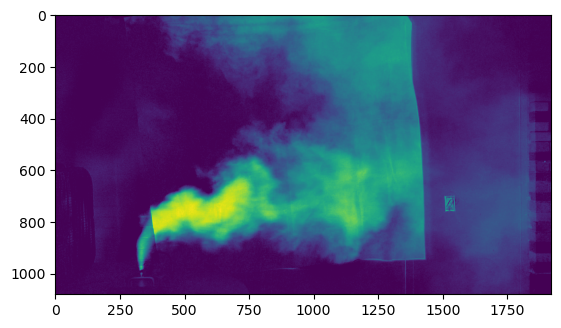

In [3]:
frame=cv2.imread(img_path)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

frame_11 = np.fliplr(frame)
frame_11_crop = frame_11[y1:y2, x1:x2]

plt.imshow(frame_11)
plt.show()

##
frame=cv2.imread(img_path2)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

frame_12 = np.fliplr(frame)
frame_12_crop = frame_12[y1:y2, x1:x2]

##
frame=cv2.imread(img_path3)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

frame_13 = np.fliplr(frame)
frame_13_crop = frame_13[y1:y2, x1:x2]

##
frame=cv2.imread(img_path4)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

frame_14 = np.fliplr(frame)
frame_14_crop = frame_14[y1:y2, x1:x2]


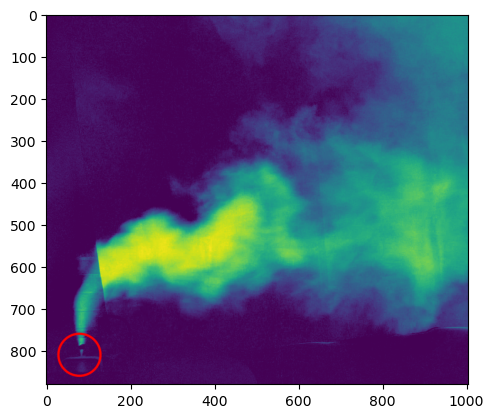

In [131]:
frame=cv2.imread(img_path)
# print(frame)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

norm = plt.Normalize(vmin=frame.min(), vmax=frame.max())
cm = plt.cm.viridis
frame = cm(norm(frame))[:,:,:3]

frame_21 = frame.copy()

frame_21 = (frame_21 * 255).astype(np.uint8)

cv2.circle(
    frame_21,
    center = leak_source,
    radius = 50,
    color=(255,0,0),
    thickness=3,
    lineType=cv2.LINE_AA
)

## testing to see if I can plot concentric circle

frame_21 = np.fliplr(frame_21)

frame_21_crop = frame_21[y1:y2, x1:x2] 

plt.imshow(frame_21_crop)
plt.show()

In [125]:
frame.shape

(1080, 1920, 3)

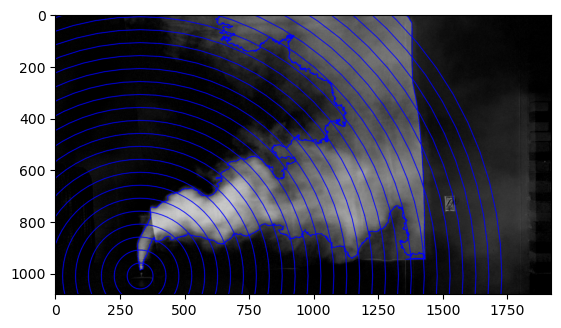

In [119]:
frame = cv2.imread(img_path)
output = plume_learner.concentric_circle(
    img=frame,
    scatter_points=False,
    plume_contour=True,
    boundary_ring=True,
    fit_poly=False,
    num_of_circs=28
)
new_frame = output[0]

# new_frame=cv2.cvtColor(new_frame,cv2.COLOR_BGR2GRAY)

frame_22 = np.fliplr(new_frame)
frame_22_crop = frame_22[y1:y2, x1:x2]

plt.imshow(frame_22)
plt.show()

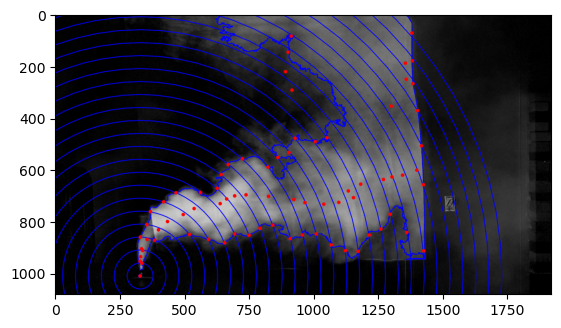

In [116]:
frame = cv2.imread(img_path)
output = plume_learner.concentric_circle(
    img=frame,
    fit_poly=False,
    boundary_ring=True,
    num_of_circs=28
)
new_frame = output[0]

# new_frame=cv2.cvtColor(new_frame,cv2.COLOR_BGR2GRAY)

frame_23 = np.fliplr(new_frame)
frame_23_crop = frame_23[y1:y2, x1:x2]

plt.imshow(frame_23,cmap=None)
plt.show()

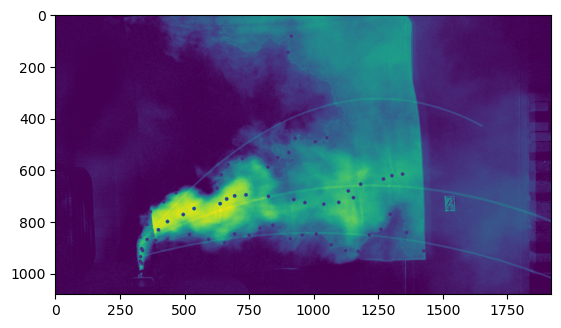

In [115]:
frame = cv2.imread(img_path)
output = plume_learner.concentric_circle(
    img=frame,
    fit_poly=True,
    boundary_ring=False,
    num_of_circs=22
)
new_frame = output[0]
new_frame=cv2.cvtColor(new_frame,cv2.COLOR_BGR2GRAY)

frame_24 = np.fliplr(new_frame)
frame_24_crop = frame_24[y1:y2, x1:x2]


plt.imshow(frame_24,cmap=None)
plt.show()

(1080, 1920, 3)


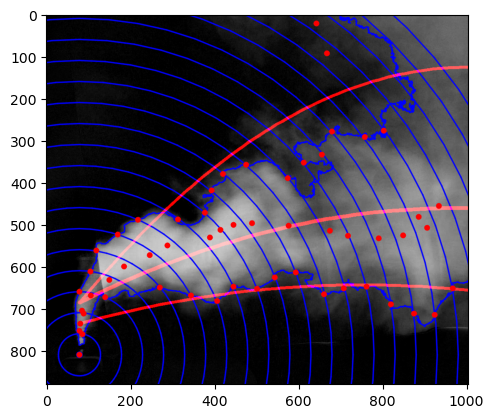

In [8]:
print(frame_24.shape)
test = frame_24[200:1080,250:1255]
plt.imshow(test)

### Putting figures together into plot

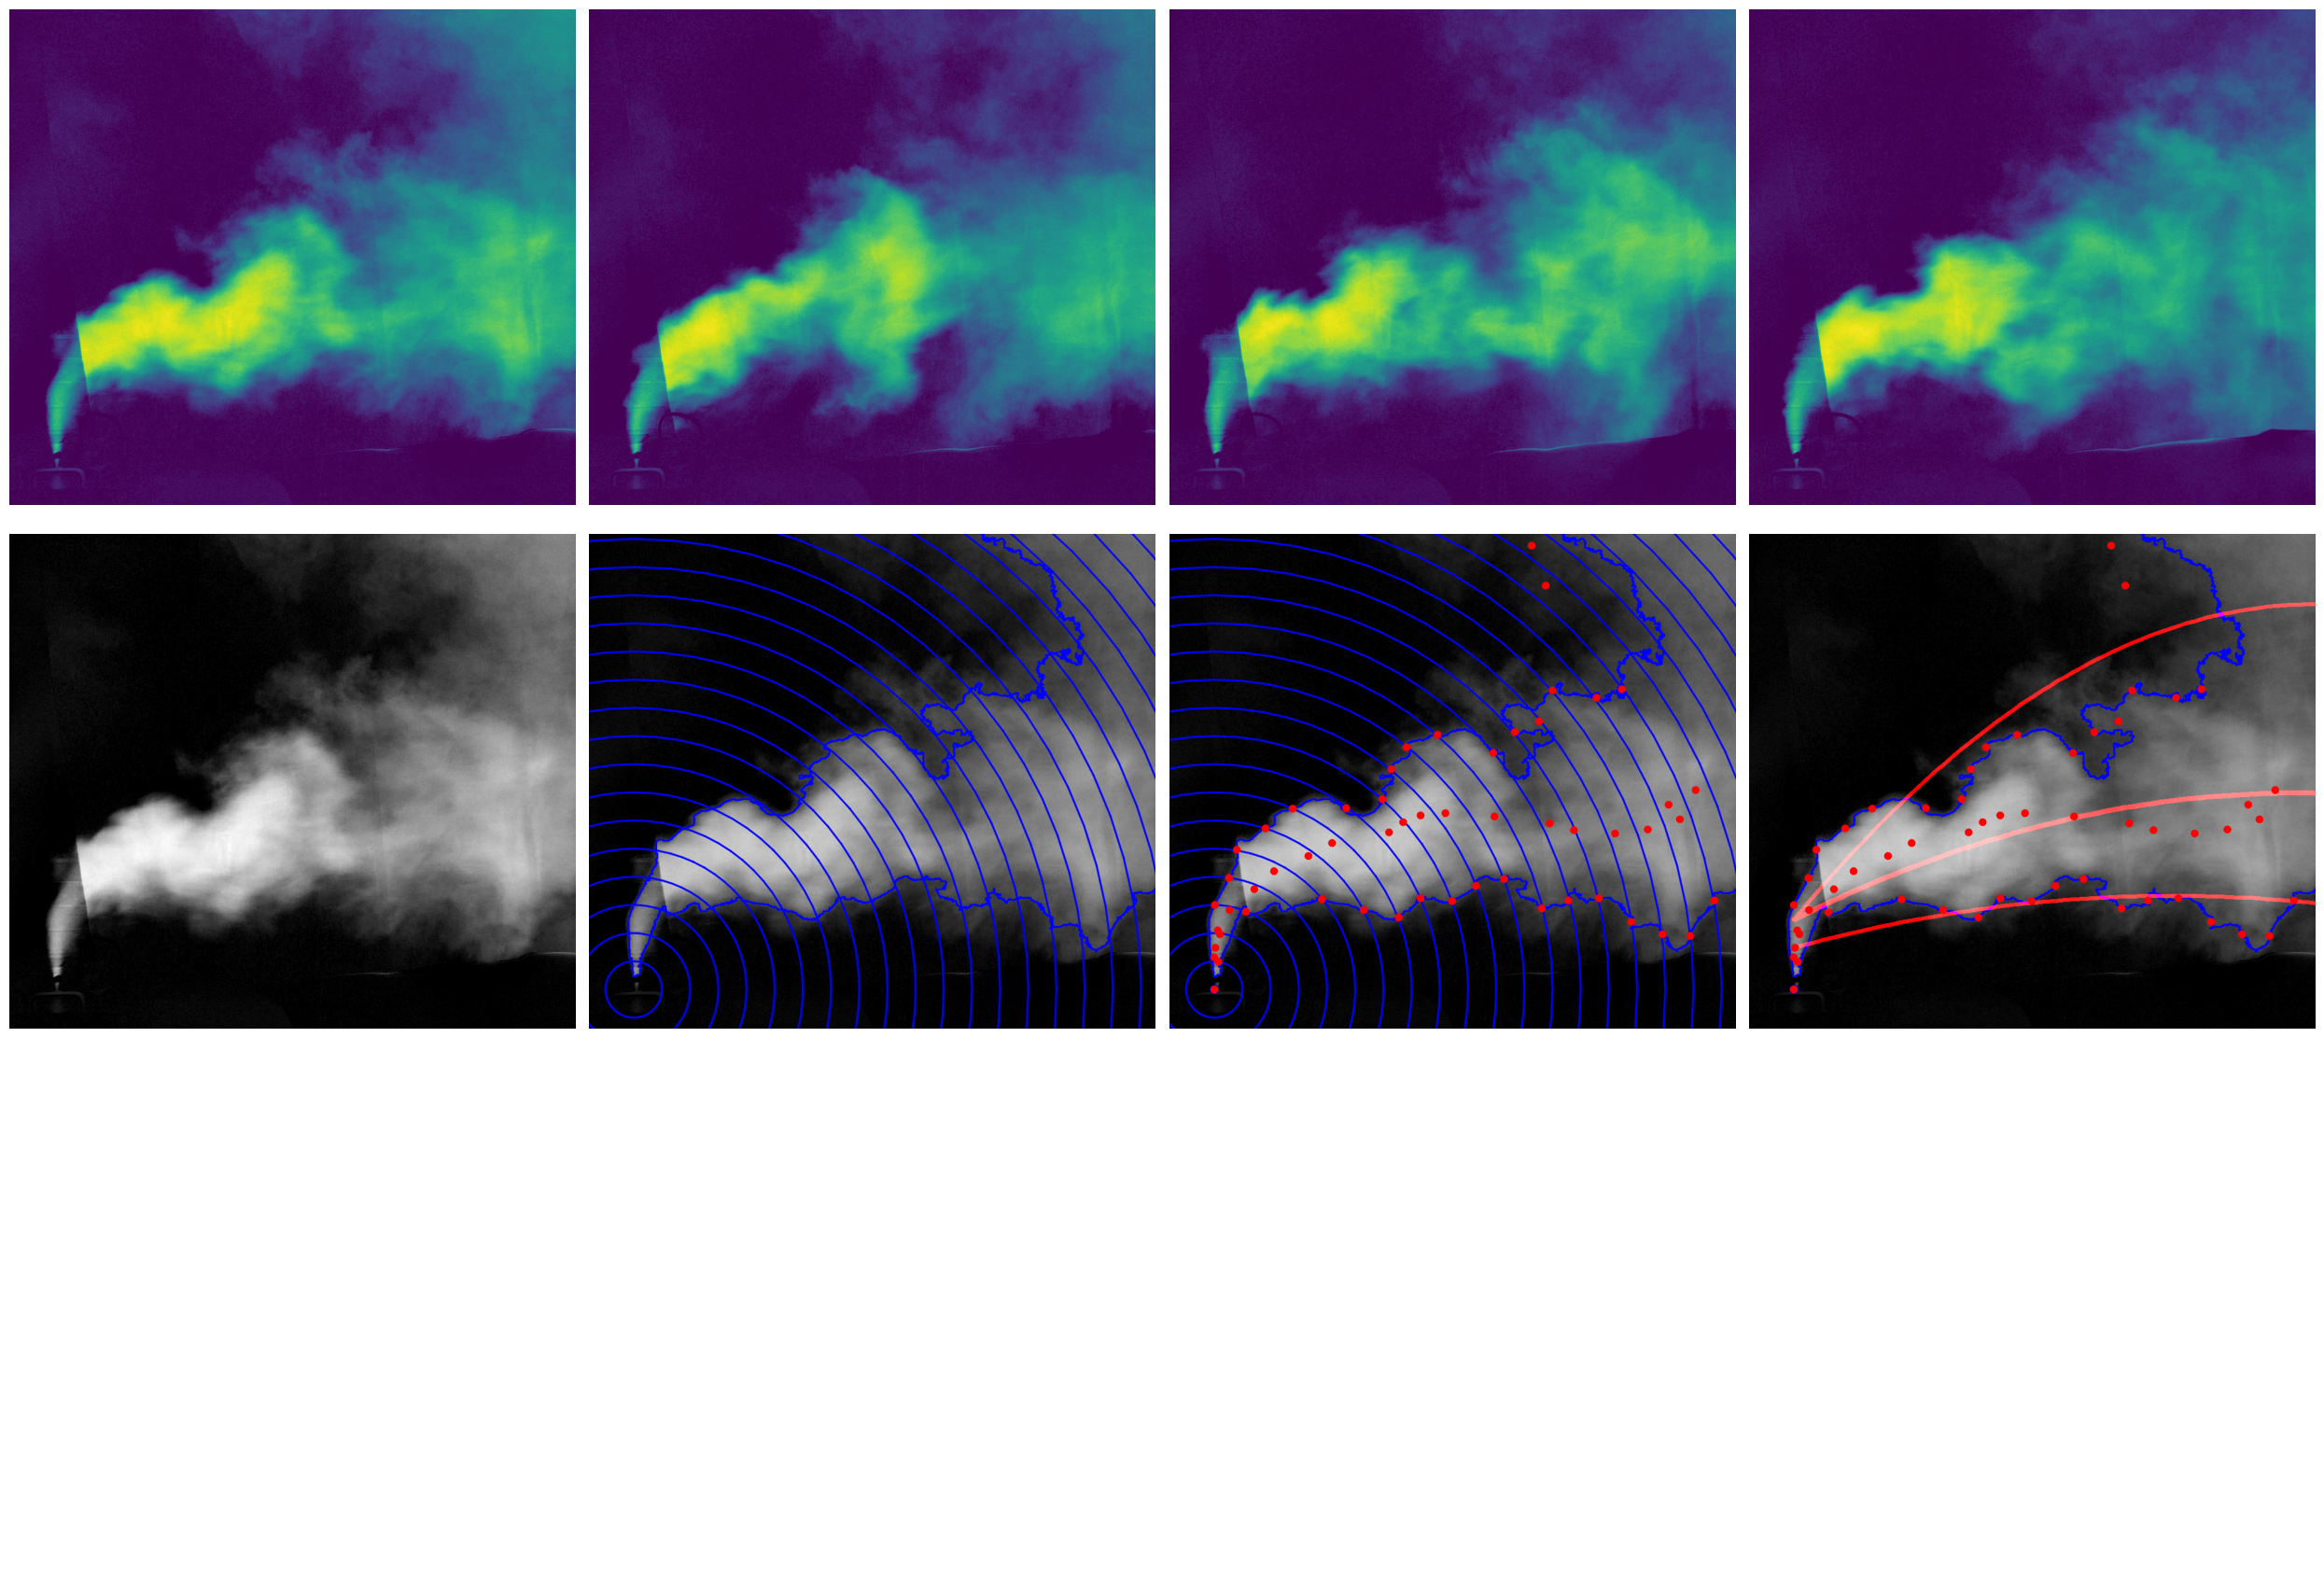

In [11]:
# Assuming img1, img2, img3, img4 are your numpy arrays representing images
# Replace these with your actual numpy arrays
img1 = frame_11_crop
img2 = frame_12_crop
img3 = frame_13_crop
img4 = frame_14_crop

# Set the overall size of the figure
fig, axes = plt.subplots(3, 4, figsize=(25, 17))  # Adjust the width and height as needed

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.2)

# Plot the images
axes[0,0].imshow(img1)
# axes[0].set_title('Image 1')
axes[0,0].axis('off')  

axes[0,1].imshow(img2)
# axes[1].set_title('Image 2')
axes[0,1].axis('off')

axes[0,2].imshow(img3)
# axes[2].set_title('Image 3')
axes[0,2].axis('off')

axes[0,3].imshow(img4)
# axes[3].set_title('Image 4')
axes[0,3].axis('off')


axes[1,0].imshow(frame_21_crop, cmap="gray")
# axes[3].set_title('Image 4')
axes[1,0].axis('off')

axes[1,1].imshow(frame_22_crop)
# axes[3].set_title('Image 4')
axes[1,1].axis('off')

axes[1,2].imshow(frame_23_crop)
# axes[3].set_title('Image 4')
axes[1,2].axis('off')

axes[1,3].imshow(frame_24_crop)
# axes[3].set_title('Image 4')
axes[1,3].axis('off')
# Adjust layout to prevent clipping of titles

# Add blank plots in the third row
for col in range(4):
    axes[2, col].axis('off')


plt.tight_layout()

# Show the plot
plt.show()

## Helper Functions

In [152]:
def convert_to_heatmap(img):
    img = img.copy()

    # convert to gray
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get norm and color_map 
    norm = plt.Normalize(vmin=img_gray.min(), vmax=img_gray.max())
    cm = plt.cm.viridis

    # Apply heatmap
    img_cmap = cm(norm(img_gray))[:,:,:3]

    return img_cmap

def add_concentric_circle(
        img,
        orig_center,
        radii=50,
        num_of_circ=25,
):
    """
    Parameters:
    ----------
        img: np.ndarray
    """

    # Convert to correct type
    img = img.copy()
    # print(img)
    img = (img* 255).astype(np.uint8)

    red_color = (255,0,0)
    for step in range(1, num_of_circ+1):
        radius = radii*step
        cv2.circle(
            img,
            center=orig_center,
            radius=radius,
            color=red_color,
            thickness=3,
            lineType=cv2.LINE_AA
        )

    return img

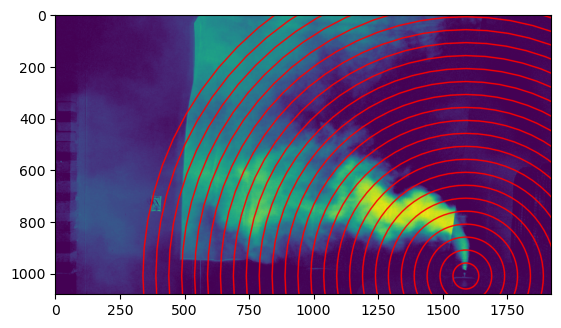

In [153]:
frame = cv2.imread(img_path)
frame_viridis = convert_to_heatmap(frame)
frame_con_cir = add_concentric_circle(frame_viridis, orig_center=leak_source)

plt.imshow(frame)
plt.imshow(frame_viridis)
plt.imshow(frame_con_cir)
plt.show()